In [16]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display options
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
plt.style.use('seaborn-v0_8-whitegrid')

In [17]:
# Load data
usnational = pd.read_csv('usnational.csv')
usgoods = pd.read_csv('usgoods.csv')
uschina = pd.read_csv('US_CHINA_TENSION.csv')
#Remove extra columns for uschina tenstion
uschina = uschina[['date', 'UCT']].copy()

# Drop any completely empty rows if they exist
uschina = uschina.dropna(subset=['date', 'UCT'])

# Check result
uschina.head()
# Preview
print("National Defense Compensation Data:")
display(usnational.head())

print("\nDefense Capital Goods Orders:")
display(usgoods.head())

print("\nU.S.–China Tension Index:")
display(uschina.head())

National Defense Compensation Data:


,observation_date,B4080C1Q027SBEA
0,1972-01-01,30.46
1,1972-04-01,29.74
2,1972-07-01,29.56
3,1972-10-01,30.88
4,1973-01-01,30.56



Defense Capital Goods Orders:


,observation_date,ADEFNO
0,1992-02-01,7270
1,1992-03-01,5729
2,1992-04-01,7052
3,1992-05-01,7944
4,1992-06-01,6393



U.S.–China Tension Index:


,date,UCT
0,1993m1,44.03
1,1993m2,42.17
2,1993m3,38.65
3,1993m4,37.98
4,1993m5,50.46


In [18]:
# Convert '1993m1' style date strings to datetime (assume month start)
uschina['date'] = pd.to_datetime(uschina['date'], format='%Ym%m')

# Rename for clarity and consistency
uschina = uschina.rename(columns={'UCT': 'us_china_tension'})

# Preview cleaned data
uschina.head()

,date,us_china_tension
0,1993-01-01,44.03
1,1993-02-01,42.17
2,1993-03-01,38.65
3,1993-04-01,37.98
4,1993-05-01,50.46


=== USNATIONAL (military compensation) ===
            military_comp
date                     
1972-01-01          30.46
1972-04-01          29.74
1972-07-01          29.56
1972-10-01          30.88
1973-01-01          30.56
            military_comp
date                     
2024-04-01         206.34
2024-07-01         208.95
2024-10-01         209.60
2025-01-01         209.69
2025-04-01         213.51
QS-OCT


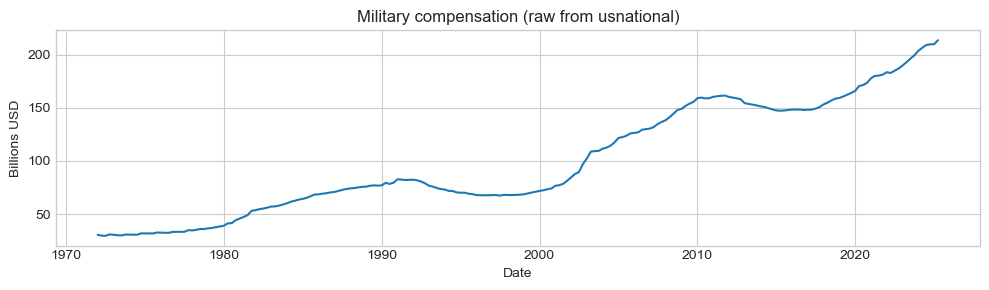

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# --- usnational: QUARTERLY defense compensation ---

# rename column to something readable
usnational = usnational.rename(columns={'observation_date': 'date',
                                        'B4080C1Q027SBEA': 'military_comp'})

# make sure 'date' is datetime
usnational['date'] = pd.to_datetime(usnational['date'])

# set index
usnational = usnational.set_index('date')

# inspect head / tail / info
print("=== USNATIONAL (military compensation) ===")
print(usnational.head())
print(usnational.tail())
print(usnational.index.inferred_freq)  # what pandas thinks the freq is

# quick plot (raw, no resampling yet)
plt.figure(figsize=(10,3))
plt.plot(usnational.index, usnational['military_comp'])
plt.title('Military compensation (raw from usnational)')
plt.xlabel('Date')
plt.ylabel('Billions USD')
plt.tight_layout()
plt.show()


=== USGOODS (defense orders) ===
            defense_orders
date                      
1992-02-01            7270
1992-03-01            5729
1992-04-01            7052
1992-05-01            7944
1992-06-01            6393
            defense_orders
date                      
2025-04-01           13719
2025-05-01           19355
2025-06-01           17229
2025-07-01           15265
2025-08-01           15798
MS


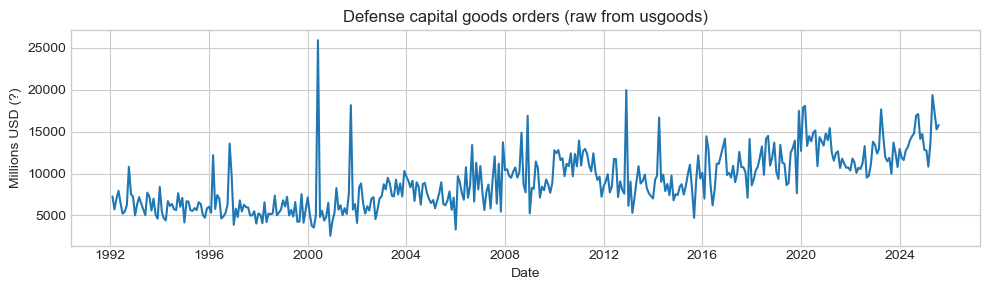

In [20]:

# --- usgoods: MONTHLY defense orders ---

# rename columns
usgoods = usgoods.rename(columns={'observation_date': 'date',
                                  'ADEFNO': 'defense_orders'})

# convert date
usgoods['date'] = pd.to_datetime(usgoods['date'])

# set index
usgoods = usgoods.set_index('date')

print("\n=== USGOODS (defense orders) ===")
print(usgoods.head())
print(usgoods.tail())
print(usgoods.index.inferred_freq)

plt.figure(figsize=(10,3))
plt.plot(usgoods.index, usgoods['defense_orders'])
plt.title('Defense capital goods orders (raw from usgoods)')
plt.xlabel('Date')
plt.ylabel('Millions USD (?)')
plt.tight_layout()
plt.show()



=== USCHINA (US-China tension index) ===
            us_china_tension
date                        
1993-01-01             44.03
1993-02-01             42.17
1993-03-01             38.65
1993-04-01             37.98
1993-05-01             50.46
            us_china_tension
date                        
2023-10-01            125.05
2023-11-01            131.47
2023-12-01            134.12
2024-01-01            137.90
2024-02-01            115.86
MS


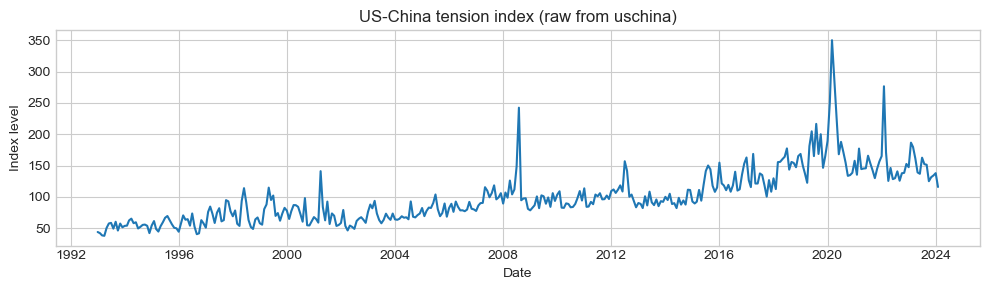

In [22]:
# --- uschina: MONTHLY US-China tension ---

# parse "1993m1" style dates
uschina['date'] = pd.to_datetime(uschina['date'], format='%Ym%m')

# rename column
uschina = uschina.rename(columns={'UCT': 'us_china_tension'})

# set index
uschina = uschina.set_index('date')

print("\n=== USCHINA (US-China tension index) ===")
print(uschina.head())
print(uschina.tail())
print(uschina.index.inferred_freq)

plt.figure(figsize=(10,3))
plt.plot(uschina.index, uschina['us_china_tension'])
plt.title('US-China tension index (raw from uschina)')
plt.xlabel('Date')
plt.ylabel('Index level')
plt.tight_layout()
plt.show()

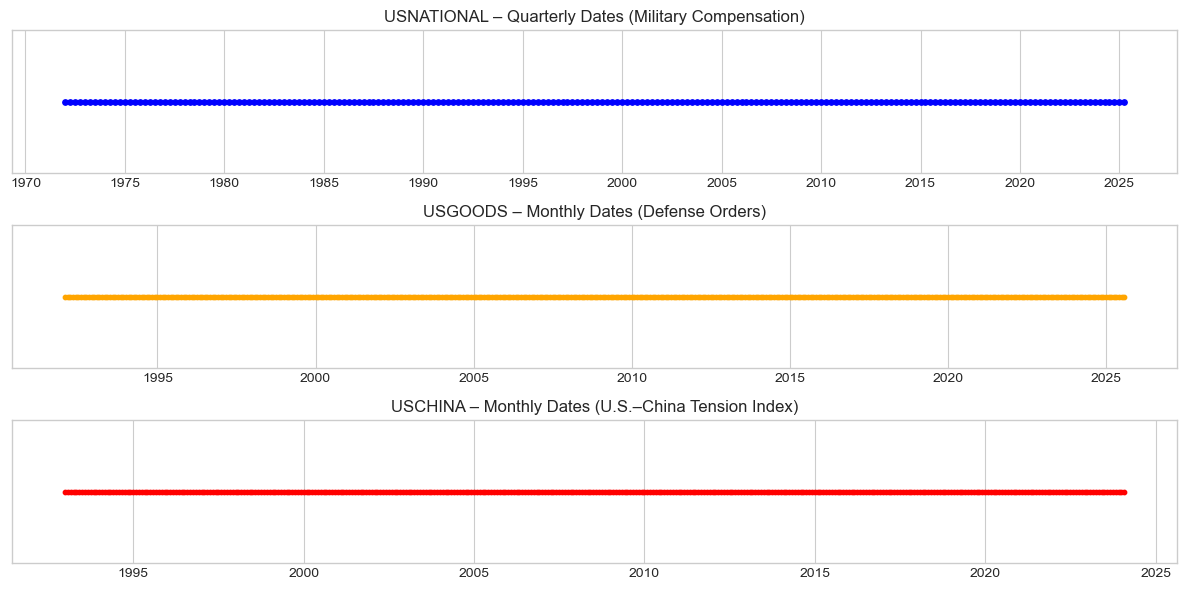

In [23]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(3, 1, figsize=(12, 6), sharex=False)

# --- usnational ---
axes[0].scatter(usnational.index, [1]*len(usnational), color='blue', s=15)
axes[0].set_title('USNATIONAL – Quarterly Dates (Military Compensation)')
axes[0].yaxis.set_visible(False)
axes[0].xaxis.set_major_locator(mdates.YearLocator(5))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# --- usgoods ---
axes[1].scatter(usgoods.index, [1]*len(usgoods), color='orange', s=10)
axes[1].set_title('USGOODS – Monthly Dates (Defense Orders)')
axes[1].yaxis.set_visible(False)
axes[1].xaxis.set_major_locator(mdates.YearLocator(5))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# --- uschina ---
axes[2].scatter(uschina.index, [1]*len(uschina), color='red', s=10)
axes[2].set_title('USCHINA – Monthly Dates (U.S.–China Tension Index)')
axes[2].yaxis.set_visible(False)
axes[2].xaxis.set_major_locator(mdates.YearLocator(5))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

=== After resampling ===
USGOODS_Q index (first 5): DatetimeIndex(['1992-03-31', '1992-06-30', '1992-09-30', '1992-12-31',
               '1993-03-31'],
              dtype='datetime64[ns]', name='date', freq='QE-DEC')
USCHINA_Q index (first 5): DatetimeIndex(['1993-03-31', '1993-06-30', '1993-09-30', '1993-12-31',
               '1994-03-31'],
              dtype='datetime64[ns]', name='date', freq='QE-DEC')
USNATIONAL index (first 5): DatetimeIndex(['1972-01-01', '1972-04-01', '1972-07-01', '1972-10-01',
               '1973-01-01'],
              dtype='datetime64[ns]', name='date', freq=None)


/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_11725/767771057.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  usgoods_q = usgoods.resample('Q').mean()
/var/folders/vr/h6b_9wy922z8p1030sgb27w00000gn/T/ipykernel_11725/767771057.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  uschina_q = uschina.resample('Q').mean()


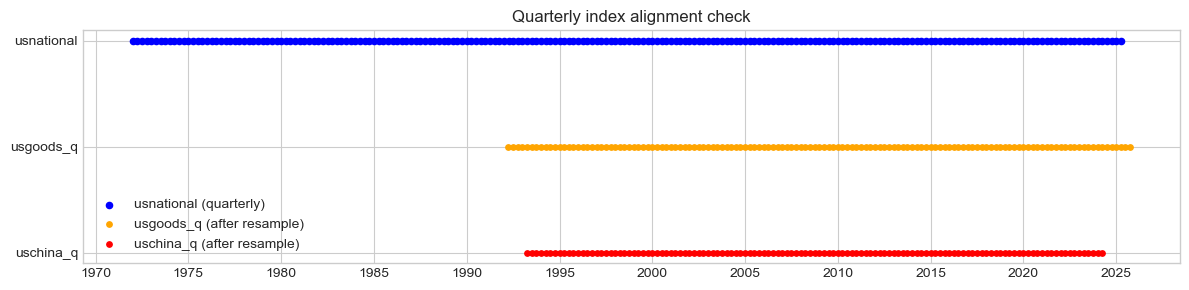

In [24]:
# Resample monthly data to quarterly averages, quarter-end alignment
usgoods_q = usgoods.resample('Q').mean()
uschina_q = uschina.resample('Q').mean()

print("=== After resampling ===")
print("USGOODS_Q index (first 5):", usgoods_q.index[:5])
print("USCHINA_Q index (first 5):", uschina_q.index[:5])
print("USNATIONAL index (first 5):", usnational.index[:5])

# Quick comparison plot of index positions
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 3))

ax.scatter(usnational.index, [3]*len(usnational), label='usnational (quarterly)', color='blue', s=20)
ax.scatter(usgoods_q.index, [2]*len(usgoods_q), label='usgoods_q (after resample)', color='orange', s=15)
ax.scatter(uschina_q.index, [1]*len(uschina_q), label='uschina_q (after resample)', color='red', s=15)

ax.set_yticks([1,2,3])
ax.set_yticklabels(['uschina_q','usgoods_q','usnational'])
ax.set_title('Quarterly index alignment check')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend()
plt.tight_layout()
plt.show()

USNATIONAL_QE index (first 5): DatetimeIndex(['1972-03-31', '1972-06-30', '1972-09-30', '1972-12-31',
               '1973-03-31'],
              dtype='datetime64[ns]', name='date', freq='QE-DEC')

Merged data shape: (214, 3)


,military_comp,defense_orders,us_china_tension
date,,,
1972-03-31,30.46,NaN,NaN
1972-06-30,29.74,NaN,NaN
1972-09-30,29.56,NaN,NaN
1972-12-31,30.88,NaN,NaN
1973-03-31,30.56,NaN,NaN
1973-06-30,30.12,NaN,NaN
1973-09-30,29.89,NaN,NaN
1973-12-31,30.74,NaN,NaN
1974-03-31,30.68,NaN,NaN


,military_comp,defense_orders,us_china_tension
date,,,
2023-03-31,189.64,"12,924.33",171.19
2023-06-30,192.73,"14,780.67",145.75
2023-09-30,196.06,"11,103.00",155.37
2023-12-31,199.22,"12,301.67",130.21
2024-03-31,203.51,"12,130.00",126.88
2024-06-30,206.34,"13,293.00",NaN
2024-09-30,208.95,"15,374.67",NaN
2024-12-31,209.60,"15,310.67",NaN
2025-03-31,209.69,"12,126.00",NaN


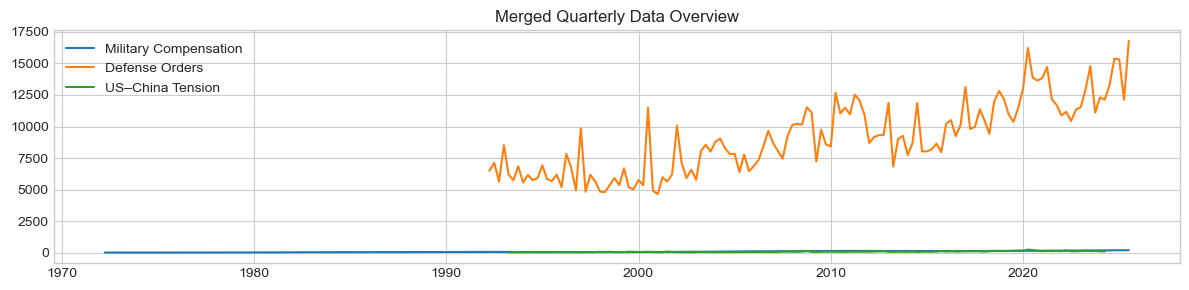

In [25]:
# Align usnational's index to quarter-end (so 1972-01-01 → 1972-03-31)
usnational_qe = usnational.copy()
usnational_qe.index = usnational_qe.index.to_period('Q').to_timestamp('Q')

# Confirm the fix
print("USNATIONAL_QE index (first 5):", usnational_qe.index[:5])

# Merge the three quarterly dataframes
data = (
    usnational_qe
    .merge(usgoods_q, left_index=True, right_index=True, how='left')
    .merge(uschina_q, left_index=True, right_index=True, how='left')
)

# Inspect merged structure
print("\nMerged data shape:", data.shape)
display(data.head(10))
display(data.tail(10))

# Visual check of time coverage
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(data.index, data['military_comp'], label='Military Compensation')
ax.plot(data.index, data['defense_orders'], label='Defense Orders')
ax.plot(data.index, data['us_china_tension'], label='US–China Tension')
ax.set_title('Merged Quarterly Data Overview')
ax.legend()
plt.tight_layout()
plt.show()

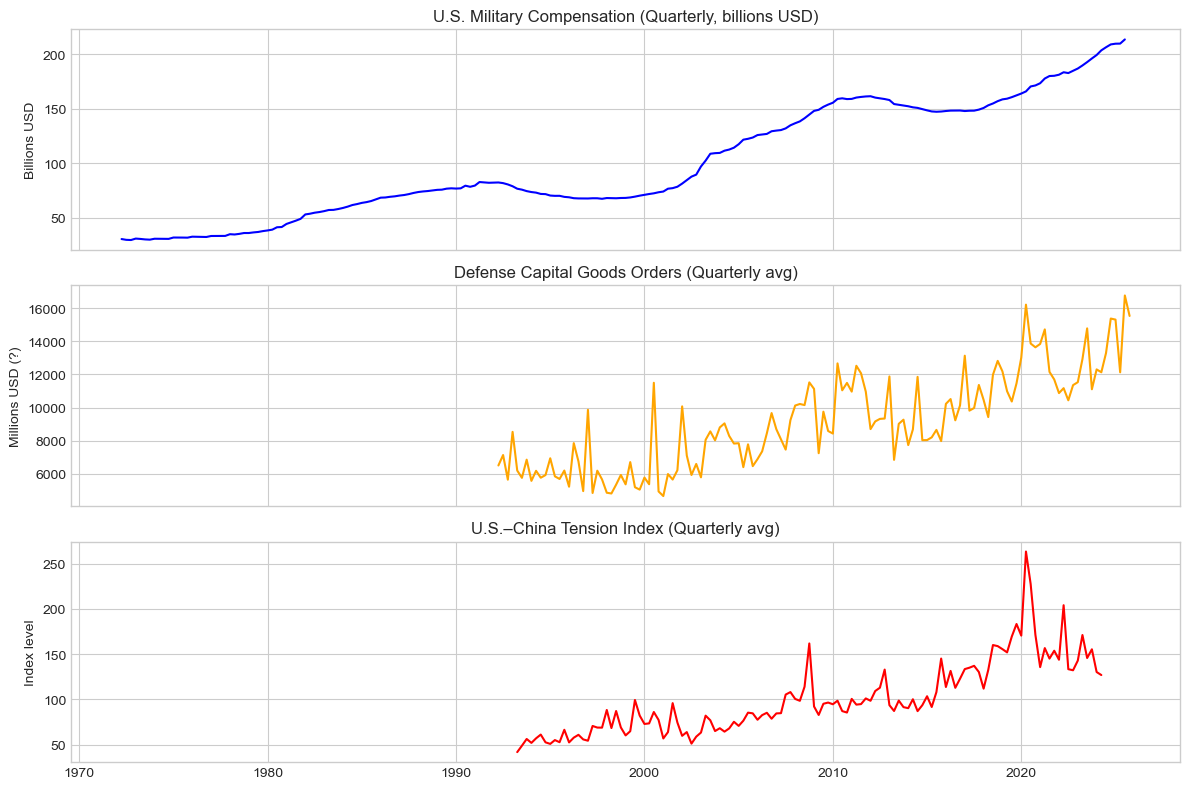

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# --- Military compensation (now quarter-end) ---
usnational_qe = usnational.copy()
usnational_qe.index = usnational_qe.index.to_period('Q').to_timestamp('Q')

axes[0].plot(usnational_qe.index, usnational_qe['military_comp'], color='blue')
axes[0].set_title('U.S. Military Compensation (Quarterly, billions USD)')
axes[0].set_ylabel('Billions USD')

# --- Defense capital goods orders (already quarter-end) ---
axes[1].plot(usgoods_q.index, usgoods_q['defense_orders'], color='orange')
axes[1].set_title('Defense Capital Goods Orders (Quarterly avg)')
axes[1].set_ylabel('Millions USD (?)')

# --- U.S.–China tension index (already quarter-end) ---
axes[2].plot(uschina_q.index, uschina_q['us_china_tension'], color='red')
axes[2].set_title('U.S.–China Tension Index (Quarterly avg)')
axes[2].set_ylabel('Index level')

plt.tight_layout()
plt.show()

Start & end dates before trimming:

usnational_qe: 1972-03-31 → 2025-06-30
usgoods_q:     1992-03-31 → 2025-09-30
uschina_q:     1993-03-31 → 2024-03-31

Common overlapping period:
1993-03-31 → 2024-03-31

After trimming:
usnational_trim: 1993-03-31 → 2024-03-31, 125 obs
usgoods_trim:     1993-03-31 → 2024-03-31, 125 obs
uschina_trim:     1993-03-31 → 2024-03-31, 125 obs


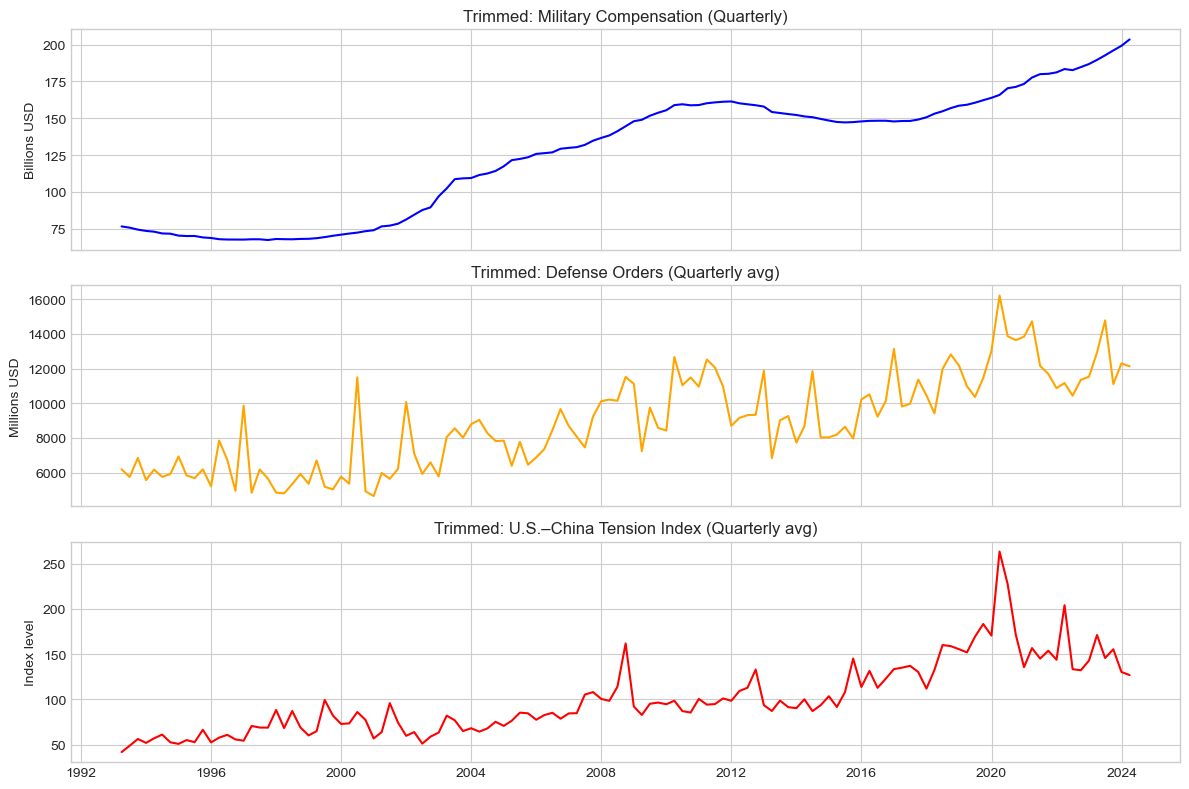

In [28]:
# First, align usnational to quarter-end (as before)
usnational_qe = usnational.copy()
usnational_qe.index = usnational_qe.index.to_period('Q').to_timestamp('Q')

# Check start and end dates for each dataset
print("Start & end dates before trimming:\n")
print(f"usnational_qe: {usnational_qe.index.min().date()} → {usnational_qe.index.max().date()}")
print(f"usgoods_q:     {usgoods_q.index.min().date()} → {usgoods_q.index.max().date()}")
print(f"uschina_q:     {uschina_q.index.min().date()} → {uschina_q.index.max().date()}")

# Determine the common overlapping period
common_start = max(usnational_qe.index.min(), usgoods_q.index.min(), uschina_q.index.min())
common_end   = min(usnational_qe.index.max(), usgoods_q.index.max(), uschina_q.index.max())

print("\nCommon overlapping period:")
print(f"{common_start.date()} → {common_end.date()}")

# Trim each dataset to that common range
usnational_trim = usnational_qe.loc[common_start:common_end].copy()
usgoods_trim = usgoods_q.loc[common_start:common_end].copy()
uschina_trim = uschina_q.loc[common_start:common_end].copy()

# Check results
print("\nAfter trimming:")
print(f"usnational_trim: {usnational_trim.index.min().date()} → {usnational_trim.index.max().date()}, {len(usnational_trim)} obs")
print(f"usgoods_trim:     {usgoods_trim.index.min().date()} → {usgoods_trim.index.max().date()}, {len(usgoods_trim)} obs")
print(f"uschina_trim:     {uschina_trim.index.min().date()} → {uschina_trim.index.max().date()}, {len(uschina_trim)} obs")

# Visualize trimmed data coverage
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(usnational_trim.index, usnational_trim['military_comp'], color='blue')
axes[0].set_title('Trimmed: Military Compensation (Quarterly)')
axes[0].set_ylabel('Billions USD')

axes[1].plot(usgoods_trim.index, usgoods_trim['defense_orders'], color='orange')
axes[1].set_title('Trimmed: Defense Orders (Quarterly avg)')
axes[1].set_ylabel('Millions USD')

axes[2].plot(uschina_trim.index, uschina_trim['us_china_tension'], color='red')
axes[2].set_title('Trimmed: U.S.–China Tension Index (Quarterly avg)')
axes[2].set_ylabel('Index level')

plt.tight_layout()
plt.show()

Merged dataset shape: (125, 3)


,military_comp,defense_orders,us_china_tension
date,,,
1993-03-31,76.61,"6,193.00",41.61
1993-06-30,75.76,"5,751.67",48.70
1993-09-30,74.42,"6,850.33",56.14
1993-12-31,73.55,"5,569.67",51.83
1994-03-31,73.02,"6,176.67",56.85


,military_comp,defense_orders,us_china_tension
date,,,
2023-03-31,189.64,"12,924.33",171.19
2023-06-30,192.73,"14,780.67",145.75
2023-09-30,196.06,"11,103.00",155.37
2023-12-31,199.22,"12,301.67",130.21
2024-03-31,203.51,"12,130.00",126.88



Missing values per column:
military_comp       0
defense_orders      0
us_china_tension    0
dtype: int64


,military_comp,defense_orders,us_china_tension
count,125.00,125.00,125.00
mean,126.60,"8,903.85",100.07
std,41.30,"2,678.80",40.02
min,67.37,"4,651.00",41.61
25%,76.61,"6,459.00",68.78
50%,144.59,"8,688.67",91.54
75%,158.81,"11,039.33",130.21
max,203.51,"16,213.67",263.55


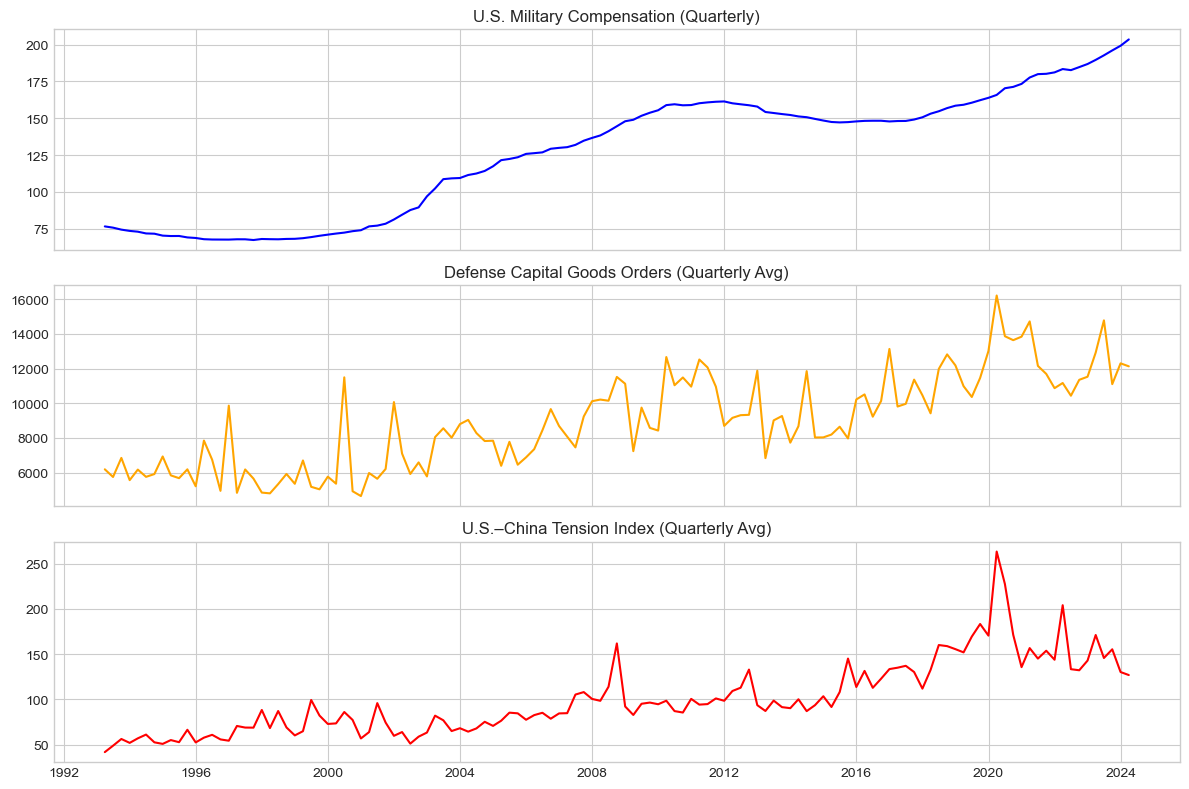

In [29]:
# Merge on aligned quarter-end indices
data = (
    usnational_trim
    .merge(usgoods_trim, left_index=True, right_index=True, how='inner')
    .merge(uschina_trim, left_index=True, right_index=True, how='inner')
)

# Inspect structure
print("Merged dataset shape:", data.shape)
display(data.head())
display(data.tail())

# Check for missing values
print("\nMissing values per column:")
print(data.isna().sum())

# Quick descriptive summary
display(data.describe())

# Visual overview
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax[0].plot(data.index, data['military_comp'], color='blue')
ax[0].set_title('U.S. Military Compensation (Quarterly)')

ax[1].plot(data.index, data['defense_orders'], color='orange')
ax[1].set_title('Defense Capital Goods Orders (Quarterly Avg)')

ax[2].plot(data.index, data['us_china_tension'], color='red')
ax[2].set_title('U.S.–China Tension Index (Quarterly Avg)')

plt.tight_layout()
plt.show()

In [1]:
# Define output path and file name
output_path = "us_military_expenditure_clean.csv"

# Save the final merged quarterly dataset
data.to_csv(output_path, index=True)

print(f"✅ Final dataset exported successfully to: {output_path}")
print(f"Shape: {data.shape}")
print(f"Date range: {data.index.min().date()} → {data.index.max().date()}")

# Quick confirmation preview
display(data.head())

NameError: name 'data' is not defined